In [75]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from matplotlib import pyplot as plt
from pathlib import Path

In [76]:
data_path = Path("data")
image_path = data_path / "MNIST"
train_dataset = datasets.MNIST(root=image_path,
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
test_dataset = datasets.MNIST(root=image_path,
                              train=False,
                              transform=transforms.ToTensor(),
                              download=False)
train_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data\MNIST
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data\MNIST
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [77]:
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [78]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [79]:
class Model1(nn.Module):
    def __init__(self, in_shape: int, hidden_units: int, out_shape: int) -> nn.Module:
        super().__init__()
        self.layer1 = nn.Sequential(nn.Flatten(),
                                    nn.Linear(in_features=in_shape, out_features=hidden_units),
                                    nn.Linear(in_features=hidden_units,out_features=hidden_units),
                                    nn.Linear(in_features=hidden_units,out_features=out_shape))

    def forward(self,x):
        return self.layer1(x)

In [80]:
model1 = Model1(28*28,10,len(train_dataset.classes))
model1

Model1(
  (layer1): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [81]:
def random_predictions():
    fig = plt.figure(figsize=(10,10))
    rows, cols = 3,3
    for i in range(1,rows*cols+1):
        rand_int = torch.randint(0,len(test_dataset),size=[1]).item()
        rand_img, rand_lbl = test_dataset[rand_int]
        y_pred = model1(rand_img).argmax(dim=1)
        pred_class = test_dataset.classes[y_pred]
        fig.add_subplot(rows,cols,i)
        plt.imshow(rand_img.permute(1,2,0),cmap="gray")
        plt.title(f"Pred: {pred_class}, Actual: {rand_lbl}")
        plt.axis(False)

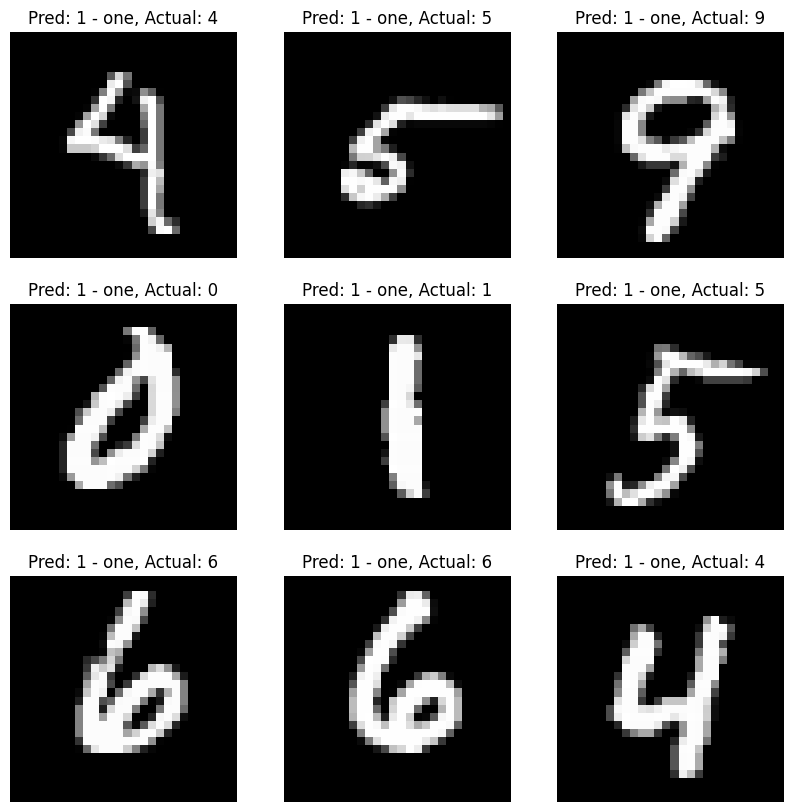

In [82]:
random_predictions()

In [83]:
def train_test_loop(model: nn.Module,
                    train_dataloader: torch.utils.data.DataLoader,
                    test_dataloader: torch.utils.data.DataLoader,
                   epochs: int,
                   loss_fn: nn.Module,
                   optimizer: torch.optim.Optimizer):
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for batch,(X,y) in enumerate(train_dataloader):
            y_pred = model(X)
            loss = loss_fn(y_pred,y)
            train_loss += loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        train_loss /= len(train_dataloader)
        model.eval()
        test_loss = 0
        with torch.inference_mode():
            for batch,(X,y) in enumerate(test_dataloader):
                y_pred = model(X)
                loss = loss_fn(y_pred,y)
                test_loss += loss
            test_loss /= len(test_dataloader)
        print(f"Epoch: {epoch}\nTrain loss: {train_loss} | Test loss {test_loss}")

In [84]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model1.parameters(),lr=0.001)

In [85]:
train_test_loop(model1, train_dataloader, test_dataloader, 5,loss_fn,optimizer)

Epoch: 0
Train loss: 0.5360194444656372 | Test loss 0.33179494738578796
Epoch: 1
Train loss: 0.32757386565208435 | Test loss 0.30734938383102417
Epoch: 2
Train loss: 0.30169910192489624 | Test loss 0.3013114035129547
Epoch: 3
Train loss: 0.27983924746513367 | Test loss 0.27197030186653137
Epoch: 4
Train loss: 0.2703031599521637 | Test loss 0.2732645273208618


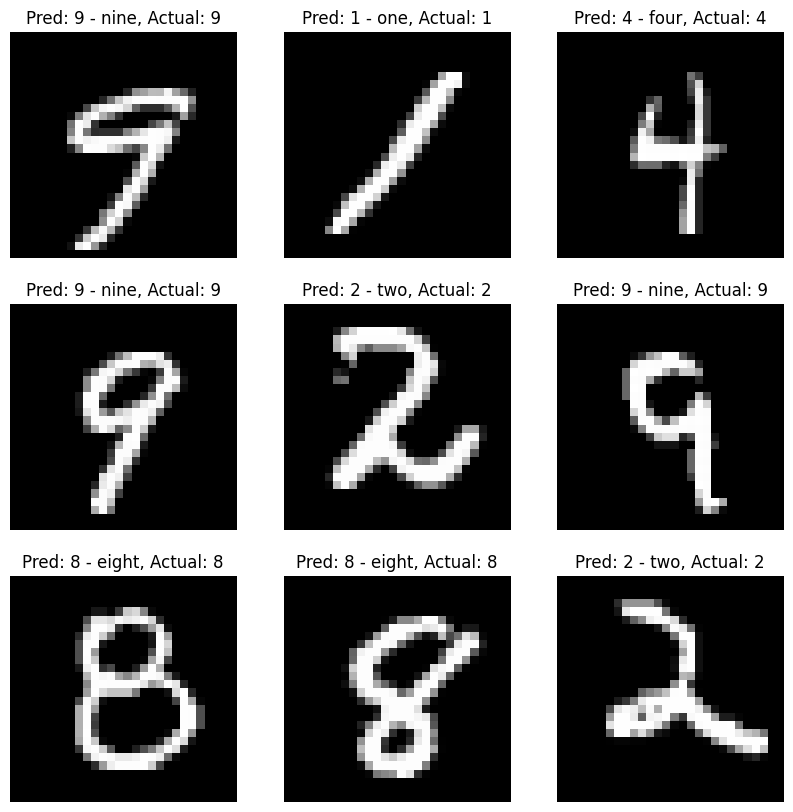

In [86]:
random_predictions()